## Task 

NLP Task: Tweet Enhancement for Higher Engagement

Task Overview

Develop an NLP-based enhancement model that analyzes tweet text and suggests improvements to increase engagement (likes, retweets, and reach). The system should provide actionable recommendations to optimize tweets for better performance.

Dataset
- Name: Tweets and User Engagement Dataset
- File: Twitterdatainsheets.csv

Relevant Features:
- text → The actual tweet content (to be optimized)
- Likes, RetweetCount, Reach → Engagement metrics (used to evaluate tweet effectiveness)
- Sentiment → Determines the emotional tone of the tweet
- Klout → Measures the influence of the user posting the tweet
- Weekday, Hour → Useful for posting time recommendations

Task Breakdown

1. Preprocessing
- Clean tweets: Remove links, special characters, and unnecessary whitespace.
- Normalize text: Convert to lowercase and remove stopwords.
- Extract keywords and hashtags: Identify key terms influencing engagement.
2. Engagement Prediction
- Train an NLP model using tweet text and engagement metrics (Likes, RetweetCount, Reach).
- Implement a regression model to predict the engagement score of a given tweet.
- Identify text patterns that correlate with higher engagement.
3. Tweet Enhancement & Recommendations
- Suggest content improvements based on high-performing tweet patterns:
- Optimize phrasing: Recommend changes in wording or tone.
- Hashtag recommendations: Suggest effective hashtags.
- Call-to-action enhancements: Improve engagement triggers (e.g., “Retweet if you agree!”).
- Suggest best posting times based on dataset trends.

### Example Input & Output

```
Input Tweet:
{
  "text": "New job opening at our company! Apply here: https://link.com #hiring #jobs",
  "Weekday": "Monday",
  "Hour": 15
}
```
​
- Predicted Engagement Score:
  - 📊 3.2 / 10 (Low Engagement)

- Suggested Enhancements:
  - ✅ Optimized Tweet:"Exciting opportunity! 🚀 We're hiring for a new role – apply today! 🌟 → [link] #JobSearch #CareerGrowth"

- ✅ Best Posting Time:
  - Tuesday at 12 PM (historically higher engagement)

- ✅ Hashtag Improvements:
  - Use #JobSearch #CareerGrowth instead of generic #hiring #jobs (low-performing hashtags)

Expected Deliverables
- Python Codebase with:
- NLP preprocessing
- Engagement prediction model
- Tweet enhancement algorithm
- README (setup instructions & methodology)
- Short Report (approach, findings, and sample results)

In [231]:
import pandas as pd
import random
import re
from tqdm import tqdm
import numpy as np
from collections import defaultdict

In [8]:
! ls

EDA.ipynb  task.html  Twitterdatainsheets.csv  Twitterdatainsheets.csv.zip


In [3]:
data = pd.read_csv('./Twitterdatainsheets.csv')

/tmp/ipykernel_10029/1437048321.py:1: DtypeWarning: Columns (3,4,5,6,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./Twitterdatainsheets.csv')


In [4]:
data.head()

,index,TweetID,Weekday,Hour,Day,Lang,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,text,LocationID,UserID
0,0,tw-682712873332805633,Thursday,17,31,en,False,44.0,0.0,0.0,35.0,0.0,We are hiring: Senior Software Engineer - Prot...,3751.0,tw-40932430
1,1,tw-682713045357998080,Thursday,17,31,en,True,1810.0,5.0,0.0,53.0,2.0,RT @CodeMineStatus: This is true Amazon Web Se...,3989.0,tw-3179389829
2,2,tw-682713219375476736,Thursday,17,31,en,False,282.0,0.0,0.0,47.0,0.0,Devops Engineer Aws Ansible Cassandra Mysql Ub...,3741.0,tw-4624808414
3,3,tw-682713436967579648,Thursday,17,31,en,False,2087.0,4.0,0.0,53.0,0.0,Happy New Year to all those AWS instances of o...,3753.0,tw-356447127
4,4,tw-682714048199311366,Thursday,17,31,en,False,953.0,0.0,0.0,47.0,0.0,Amazon is hiring! #Sr. #International Tax Mana...,3751.0,tw-3172686669


In [5]:
data.columns

Index(['index', 'TweetID', ' Weekday', ' Hour', ' Day', ' Lang', ' IsReshare',
       ' Reach', ' RetweetCount', ' Likes', ' Klout', ' Sentiment', ' text',
       ' LocationID', ' UserID'],
      dtype='object')

In [6]:
data.describe()

,index,Reach,RetweetCount,Likes,Klout,Sentiment,LocationID
count,206295.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,103147.000000,8.542396e+03,8.052750,0.152770,40.389260,0.380921,2836.163440
std,59552.381229,8.867027e+04,97.863474,2.583633,13.636513,1.046559,1323.140242
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-6.000000,1.000000
25%,51573.500000,1.510000e+02,0.000000,0.000000,32.000000,0.000000,1601.000000
50%,103147.000000,4.485000e+02,0.000000,0.000000,43.000000,0.000000,3738.000000
75%,154720.500000,1.496000e+03,3.000000,0.000000,49.000000,0.666667,3775.000000
max,206294.000000,1.034245e+07,26127.000000,133.000000,99.000000,7.333333,6289.000000


In [7]:
data_dict = data.to_dict('records')

In [8]:
d = data_dict[10]

d

{'index': 10,
 'TweetID': 'tw-682719022958292992',
 ' Weekday': 'Thursday',
 ' Hour': 17,
 ' Day': 31,
 ' Lang': 'en',
 ' IsReshare': True,
 ' Reach': 86.0,
 ' RetweetCount': 51.0,
 ' Likes': 0.0,
 ' Klout': 16.0,
 ' Sentiment': 2.0,
 ' text': 'RT @awscloud: AWS CloudFormation now supports AWS WAF &amp; AWS Directory Service for MS Active Directory. https://aws.amazon.com/about-aws/whats-new/2015/12/aws-cloudformation-adds-support-for-aws-waf-and-aws-directory-service-for-microsoft-active-directory/?sc_channel=sm&sc_campaign=launches&sc_publisher=tw_go&sc_content=waf_ds&sc_country=global&sc_geo=global&sc_category=cloudformation&adbsc=social_launches_20151228_56779066&adbid=681570169089429504&adbpl=tw&adbpr=66780587 https://t.co',
 ' LocationID': 3751.0,
 ' UserID': 'tw-14458322'}

In [9]:
for d in random.sample(data_dict, 20):
    print(d[' text'], end='\n\n\n')

Apple reportedly defects iCloud from AWS to Google Cloud: Apple's use of Google Cloud Platform which began wi... https://www.google.com/url?rct=j&sa=t&url=http://thedailycroton.com/2016/03/20/apple-reportedly-defects-icloud-from-aws-to-google-cloud/&ct=ga&cd=CAIyGjNhNjYxYTQyZWZjNWIxNWM6Y29tOmVuOlVT&usg=AFQjCNFUM2Cm31Guqe6MJ8vYA7qKGZGgYA&utm_source=twitterfeed&utm_medium=twitter


Zombiler uyandnda Amazon Web Services hazr olacak http://woisio.com/en/ife-and-love/56c11506e4b0bbe73ced0931/zombiler-uyandiginda-amazon-web-services-hazir-olacak?partnerId=322


nan


Celebrating 10 Years of AWS - qwikLABS is offering unlimited access to any AWS lab in the qwikLABS catalog. https://qwiklabs.com/?utm_content=bufferc84a7&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer#section-4


"RT @velocityconf: Serverless architecture on AWS with @golang? Check out Apex!https://medium.com/@tjholowaychuk/introducing-apex-800824ffaa70#.less0o3kk http://twitter.com/velocityconf/status/689870808857

### Reason

A lot of tweets with empty texts. Should remove them

In [10]:
data1 = data[data[' text'].notna()]

In [40]:
data1.describe()

,index,Reach,RetweetCount,Likes,Klout,Sentiment,LocationID
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,8.542396e+03,8.052750,0.152770,40.389260,0.380921,2836.163440
std,28867.657797,8.867027e+04,97.863474,2.583633,13.636513,1.046559,1323.140242
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-6.000000,1.000000
25%,24999.750000,1.510000e+02,0.000000,0.000000,32.000000,0.000000,1601.000000
50%,49999.500000,4.485000e+02,0.000000,0.000000,43.000000,0.000000,3738.000000
75%,74999.250000,1.496000e+03,3.000000,0.000000,49.000000,0.666667,3775.000000
max,99999.000000,1.034245e+07,26127.000000,133.000000,99.000000,7.333333,6289.000000


In [11]:
len(data1)

100000

In [54]:
data1.columns

Index(['index', 'TweetID', ' Weekday', ' Hour', ' Day', ' Lang', ' IsReshare',
       ' Reach', ' RetweetCount', ' Likes', ' Klout', ' Sentiment', ' text',
       ' LocationID', ' UserID'],
      dtype='object')

In [69]:
data1.dtypes

index              int64
TweetID           object
 Weekday          object
 Hour             object
 Day              object
 Lang             object
 IsReshare        object
 Reach           float64
 RetweetCount    float64
 Likes           float64
 Klout           float64
 Sentiment       float64
 text             object
 LocationID      float64
 UserID           object
IsReshare          int64
dtype: object

In [61]:
d = data1.iloc[0]
d

index                                                            0
TweetID                                      tw-682712873332805633
 Weekday                                                  Thursday
 Hour                                                           17
 Day                                                            31
 Lang                                                           en
 IsReshare                                                   False
 Reach                                                        44.0
 RetweetCount                                                  0.0
 Likes                                                         0.0
 Klout                                                        35.0
 Sentiment                                                     0.0
 text            We are hiring: Senior Software Engineer - Prot...
 LocationID                                                 3751.0
 UserID                                                tw-4093

In [63]:
type(d[' IsReshare'])

bool

In [70]:
data1[' Lang'].value_counts()

 Lang
en    91886
es     1700
fr     1085
tr      877
_u      861
ja      671
de      563
in      416
tl      370
ko      330
pt      222
nl      172
it      135
zh      110
th       81
pl       77
cs       74
ru       56
fi       52
et       42
ro       33
ht       28
da       27
sv       27
cy       27
ar       22
hu       19
no       13
lt        8
lv        5
hi        3
uk        2
sl        2
iw        2
eu        1
km        1
Name: count, dtype: int64

### Reason

let's remove non Ecglish texts as outliers. They are about 8% as sum of data, But every other language is less then 1.5%.

Can drop it without losing signal. 

In [72]:
data1['IsReshare'] = data1[' IsReshare'].apply(lambda x: 1 if x else 0 )

/tmp/ipykernel_10029/2324517098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['IsReshare'] = data1[' IsReshare'].apply(lambda x: 1 if x else 0 )


<Axes: >

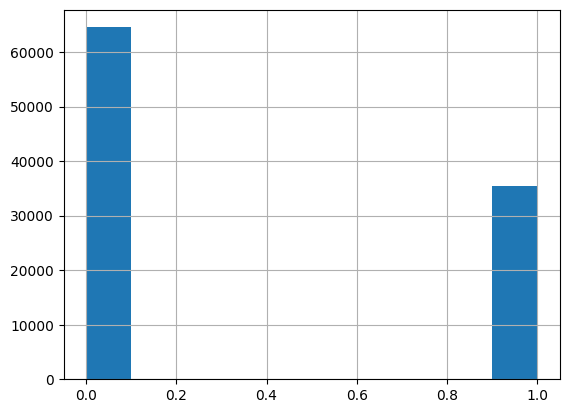

In [68]:
data1['IsReshare'].hist()

<Axes: >

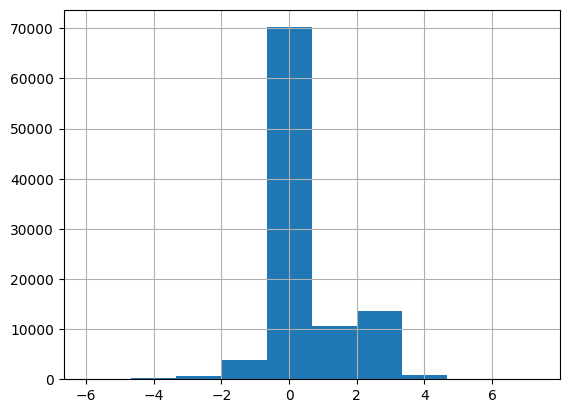

In [94]:
data1[' Sentiment'].hist()

<Axes: >

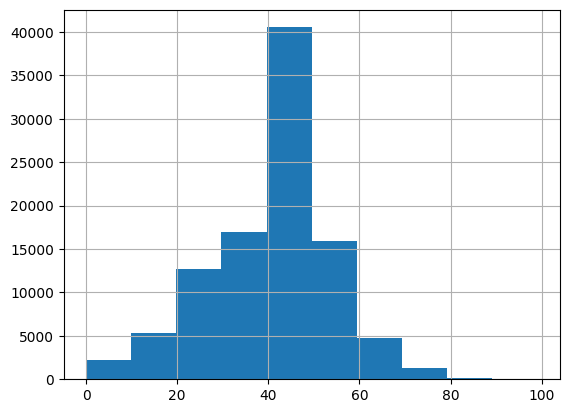

In [95]:
data1[' Klout'].hist()

<Axes: >

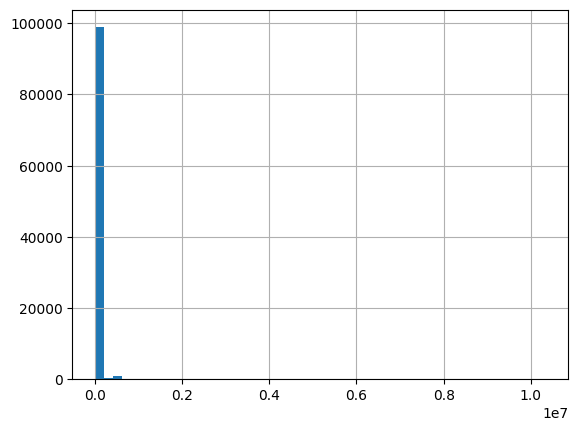

In [49]:
data1[' Reach'].hist(bins=50)

<Axes: >

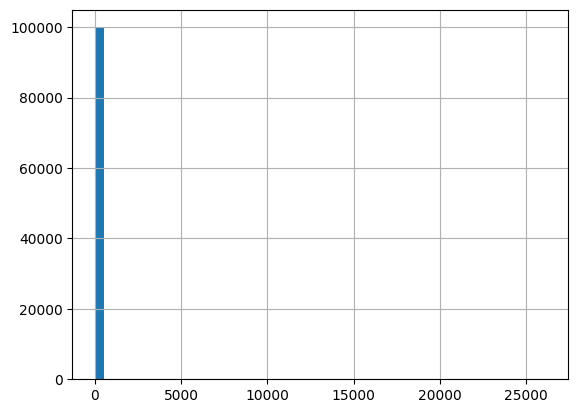

In [50]:
data1[' RetweetCount'].hist(bins=50)

<Axes: >

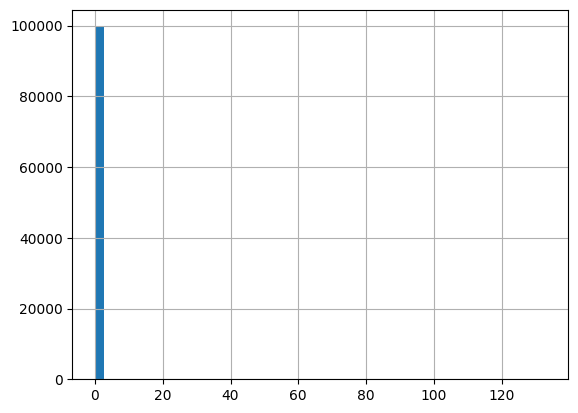

In [51]:
data1[' Likes'].hist(bins=50)

### Reason

There are some outliers in data with axis Reach, Likes, RetweetCount.

Should remove them

As a base-line let's see 95% persentile for each axis.

In [53]:
data1[[' Reach', ' RetweetCount', ' Likes']].quantile(0.95)

 Reach           16540.75
 RetweetCount       33.00
 Likes               0.00
Name: 0.95, dtype: float64

In [75]:
data1[[' Reach', ' RetweetCount', ' Likes']].quantile(0.9)

 Reach           5307.0
 RetweetCount      16.0
 Likes              0.0
Name: 0.9, dtype: float64

In [74]:
data1[[' Reach', ' RetweetCount', ' Likes']].quantile(0.6)

 Reach           702.0
 RetweetCount      1.0
 Likes             0.0
Name: 0.6, dtype: float64

### Reason

All commercial posts are not liked in most. Can neglect this value as mark of engagment.

Also RetweetCount is very small for most of tweets. Can neglect it too.

The real valuable mark of engagments id Reach.

Will use it as target for modeling and will use only it for removing outliers.

Set threshold as tr_reach = 15000

In [85]:
tr_reach = 15000

In [86]:
data2 = data1[(data1[' Lang'] == 'en') & (data1[' Reach'] < tr_reach)]

In [87]:
len(data2)

87278

<Axes: >

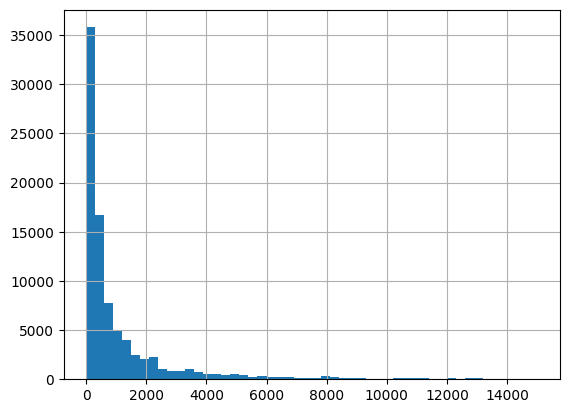

In [88]:
data2[' Reach'].hist(bins=50)

In [89]:
data2['log_Reach'] = data2[' Reach'].apply(lambda x: np.log(1 + x))

/tmp/ipykernel_10029/2007636524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['log_Reach'] = data2[' Reach'].apply(lambda x: np.log(1 + x))


<Axes: >

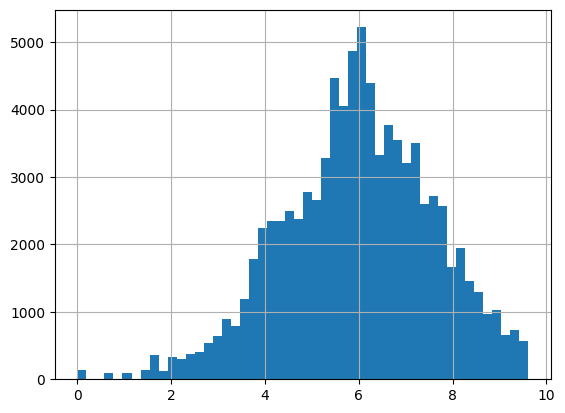

In [90]:
data2['log_Reach'].hist(bins=50)

### Reason

see that distribution is log normal. it's good to predict log_normal value of target.

let's cut left tail or distribution.

In [91]:
data3 = data2[data2['log_Reach'] > 2]

In [98]:
len(data3)

86192

In [99]:
data_dict = data3.to_dict('records')

In [101]:
for d in random.sample(data_dict, 100):
    print(d[' text'], end='\n\n\n')

Blogged:  Triggering a Lambda from SNS using CloudFormation http://iangilham.com/2016/03/22/Sns-trigger-lambda-via-cloudformation.html?utm_source=feedburner&utm_medium=twitter&utm_campaign=Feed:%20IanGilham%20(Ian%20Gilham's%20blog) #aws #awslambda #awssns


@jasuja as a group Amazon will always be cash positive thanks to their AWS revenues &amp; their other Businesses.  @ndcnn @righthalf


Data sets from@@kaggle http://blog.kaggle.com/2016/01/19/introducing-kaggle-datasets/ @Azure @IBM @awscloud @GE_Digital


With Google's new stackdriver tool IT can track apps running on AWS or GCP: Folks using mu... http://www.fiercecio.com/story/googles-new-stackdriver-tool-it-can-track-apps-running-aws-or-gcp/2016-03-24?utm_medium=rss&utm_medium=twitter&utm_source=rss&utm_source=twitterfeed&utm_campaign=rss #CIO #nextgreatCIO


"Job Opening: AWS Cloud Engineer / IT Specialist - System Admin in Charlotte NC#AWS #cloudfront #cloud #devops http://www.ironpaper.com/job-aws-system-admin/?utm_campaign=H

### Reason

Tweets with commercial tematics in IT services (seen 3 times for 100 examples).

Links are full with http, https.

Let's extract links

In [108]:
for i,d in tqdm(enumerate(data_dict)):
    text = d[' text']
    links = re.findall(r'(http.*?)(?:\s|$)', text)
    d['links'] = links
    text = re.sub(r'(http.*?)(?:\s|$)', ' ', text)
    htags = re.findall(r'(#.*?)(?:\s|$)', text)
    d['htags'] = htags
    text = re.sub(r'(#.*?)(?:\s|$)', ' ', text)
    text = text.replace('&amp;', ' ')
    text = text.replace('&nbsp;', ' ')
    text = re.sub(' +', ' ', text).strip()
    d['clean_text'] = text
    

86192it [00:01, 53956.49it/s]


In [112]:
for d in random.sample(data_dict, 100):
    print(d['clean_text'], end='\n\n\n')

We are hiring: AWS - Software Development Engineer - Visual Studio Plugin AW @awscloud


@Nicholas_Hurt @siebel_ess Oracle's Public cloud story is interesting - they're building it top-down from SaaS vs AWS's bottom-up from IaaS


RT @ForbesTech: From AWS to OpenStack Ubuntu is most preferred OS by system administrators and DevOps professionals:


AWS Scheduled Reserved Instances


RT @awscloud: Register for our FS Cloud Symposium in NY learn how AWS is helping drive innovation!


RT @CristieSoftware: Move copies of your machine to Azure SoftLayer AWS and more with


RT @JoVeSi: As new Partner @comcastbusiness will provide ethernet @awscloud connectivity


EC2 Price Reductions.


AWS CWI Technicians - Tech Usa: RESPONSIBILITIES: AWS CWI technicians with UT and PT certifications needed for


awscloud: Don't miss our 3/9 session: Migrating Mobile Apps from Parse to AWS at the NY Loft.


Google Cloud Platform signs up enterprise giants how does it compare to AWS?


AWS Informational messa

In [113]:
data4 = pd.DataFrame(data_dict)

In [115]:
data4.tail()

,index,TweetID,Weekday,Hour,Day,Lang,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,text,LocationID,UserID,IsReshare,log_Reach,links,htags,clean_text
86187,99994,tw-716349383688720385,Saturday,13,2,en,True,415.0,15.0,0.0,44.0,0.0,RT @awscloud: .@Jaspersoft built a #DataWareho...,611.0,tw-3316009302,1,6.030685,[https://aws.amazon.com/solutions/case-studies...,[#DataWarehouse],RT @awscloud: .@Jaspersoft built a that provid...
86188,99996,tw-716349615340199937,Saturday,13,2,en,False,763.0,0.0,0.0,29.0,0.0,I added a video to a @YouTube playlist https:/...,1332.0,tw-1143330170,0,6.638568,[https://www.youtube.com/watch?v=YPf7wSEq9d0&f...,[],I added a video to a @YouTube playlist Module ...
86189,99997,tw-716351557516722176,Saturday,13,2,en,True,122.0,435.0,0.0,17.0,1.0,RT @awscloud: Test your iOS Android &amp; web ...,1336.0,tw-139346924,1,4.812184,[https://cards.twitter.com/cards/13rc8b/1ihbc],[],RT @awscloud: Test your iOS Android web apps a...
86190,99998,tw-716352501860196352,Saturday,13,2,en,True,287.0,30.0,0.0,42.0,0.0,RT @goserverless: Serverless Offline: Emulate ...,3795.0,tw-21826302,1,5.662960,[https://t.co/CcXASlhQq],[],RT @goserverless: Serverless Offline: Emulate ...
86191,99999,tw-716352771209887744,Saturday,13,2,en,False,2422.0,1.0,0.0,34.0,3.0,Great turn out for the AWS Plant Sale and the ...,4007.0,tw-2286856224,0,7.792762,[],[],Great turn out for the AWS Plant Sale and the ...


In [116]:
data4['cnt_links'] = data4['links'].apply(len)

In [117]:
data4['cnt_htags'] = data4['htags'].apply(len)

In [118]:
data4['uniq_htags'] = data4['htags'].apply(lambda x: len(set(x)))

In [119]:
data4['len_text'] = data4['clean_text'].apply(len)

<Axes: >

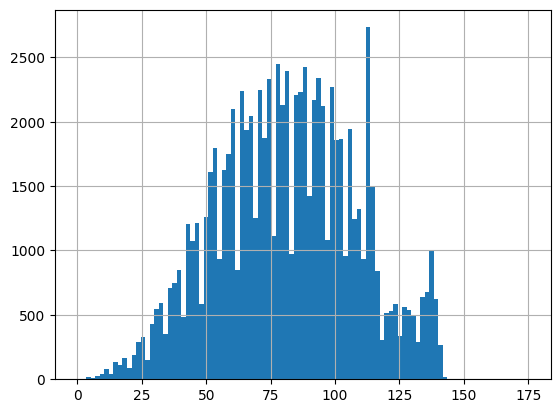

In [120]:
data4['len_text'].hist(bins=100)

<Axes: >

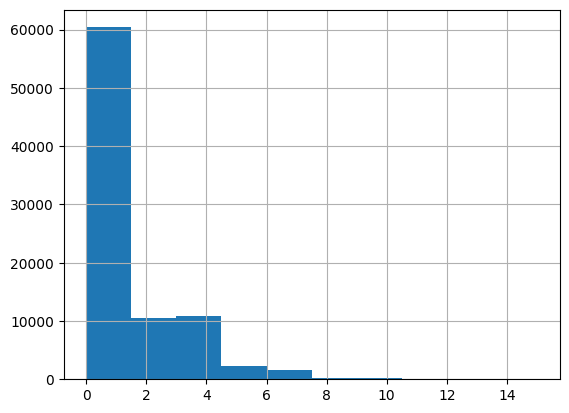

In [121]:
data4['uniq_htags'].hist(bins=10)

<Axes: >

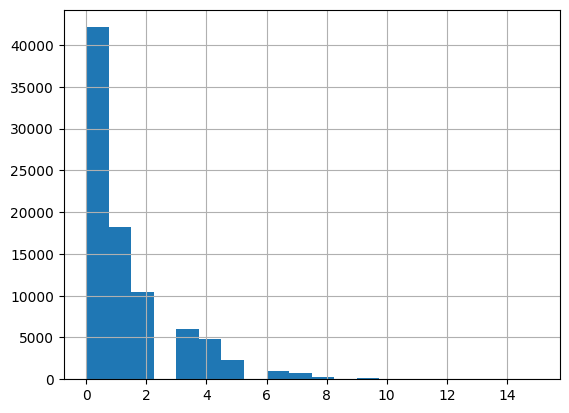

In [122]:
data4['cnt_htags'].hist(bins=20)

<Axes: >

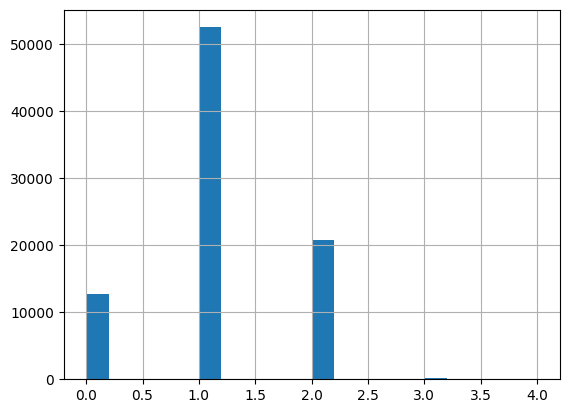

In [123]:
data4['cnt_links'].hist(bins=20)

In [124]:
data4.dtypes

index              int64
TweetID           object
 Weekday          object
 Hour             object
 Day              object
 Lang             object
 IsReshare          bool
 Reach           float64
 RetweetCount    float64
 Likes           float64
 Klout           float64
 Sentiment       float64
 text             object
 LocationID      float64
 UserID           object
IsReshare          int64
log_Reach        float64
links             object
htags             object
clean_text        object
cnt_links          int64
cnt_htags          int64
uniq_htags         int64
len_text           int64
dtype: object

In [125]:
data4[' Weekday'].value_counts()

 Weekday
Tuesday      16147
Wednesday    15877
Thursday     15757
Monday       13141
Friday       12850
Saturday      6402
Sunday        6018
Name: count, dtype: int64

### Reason

all work-days have similar quantity of tweets. is about 15k.

weekend is about 6k - 3 times lower.

lets compare tweet reach on days

In [144]:
def calc_confidence_interval(s: pd.Series):
    std = s.std()
    m = s.mean()
    n = len(s)
    k = 2
    
    d = k*std/np.sqrt(n)
    
    return (int(m - d), int(m), int(m + d))


In [128]:
data4[data4[' Weekday'] == 'Monday'][' Reach'].describe()

count    13141.000000
mean      1245.664029
std       2182.144240
min          7.000000
25%        155.000000
50%        414.000000
75%       1262.000000
max      14999.000000
Name:  Reach, dtype: float64

In [129]:
data4[data4[' Weekday'] == 'Tuesday'][' Reach'].describe()

count    16147.000000
mean      1190.985013
std       2107.781625
min          7.000000
25%        140.000000
50%        403.000000
75%       1207.500000
max      14982.000000
Name:  Reach, dtype: float64

In [156]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' , 'Saturday']

In [157]:
for dd in days:
    print(dd, calc_confidence_interval(data4[data4[' Weekday'] == dd][' Reach']))

Monday (1207, 1245, 1283)
Tuesday (1157, 1190, 1224)
Wednesday (1155, 1188, 1222)
Thursday (1187, 1221, 1254)
Friday (1187, 1225, 1262)
Saturday (1103, 1151, 1199)
Saturday (1103, 1151, 1199)


### Reason

- weekend has lower Reach values then workdays. It's statistically significant.
- Tuesday, Wednesday gives less reach then others weekdays
- Monday, Thursday, Friday - are equal by reach and best for posting

Let's take for further analysis Monday, Thursday, Thursday, Friday





In [151]:
data4[' Hour'] = data4[' Hour'].astype(int)
data4[' Day'] = data4[' Hour'].astype(int)

In [158]:
data5 = data4[data4[' Weekday'].apply(lambda x: x in ['Monday', 'Thursday', 'Friday'])]

In [159]:
len(data4), len(data5)

(86192, 41748)

In [166]:
days = sorted(set(data4[' Day']))
days

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [162]:
hours = sorted(set(data4[' Hour']))
hours

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [163]:
for h in hours: 
    print(h, calc_confidence_interval(data5[data5[' Hour'] == h][' Reach']))

0 (891, 1004, 1116)
1 (951, 1060, 1169)
2 (983, 1092, 1202)
3 (1011, 1134, 1257)
4 (1100, 1221, 1342)
5 (1013, 1123, 1232)
6 (1181, 1288, 1394)
7 (1115, 1212, 1308)
8 (1146, 1237, 1329)
9 (1226, 1316, 1406)
10 (1261, 1349, 1436)
11 (1272, 1360, 1447)
12 (1095, 1176, 1256)
13 (1182, 1273, 1365)
14 (1224, 1318, 1412)
15 (1156, 1245, 1334)
16 (1307, 1408, 1508)
17 (1168, 1271, 1373)
18 (1145, 1252, 1360)
19 (1078, 1180, 1282)
20 (1085, 1211, 1337)
21 (953, 1070, 1186)
22 (907, 1022, 1136)
23 (828, 950, 1072)


In [169]:
for dd in days: 
    print(dd, calc_confidence_interval(data5[data5[' Day'] == dd][' Reach']))

0 (891, 1004, 1116)
1 (951, 1060, 1169)
2 (983, 1092, 1202)
3 (1011, 1134, 1257)
4 (1100, 1221, 1342)
5 (1013, 1123, 1232)
6 (1181, 1288, 1394)
7 (1115, 1212, 1308)
8 (1146, 1237, 1329)
9 (1226, 1316, 1406)
10 (1261, 1349, 1436)
11 (1272, 1360, 1447)
12 (1095, 1176, 1256)
13 (1182, 1273, 1365)
14 (1224, 1318, 1412)
15 (1156, 1245, 1334)
16 (1307, 1408, 1508)
17 (1168, 1271, 1373)
18 (1145, 1252, 1360)
19 (1078, 1180, 1282)
20 (1085, 1211, 1337)
21 (953, 1070, 1186)
22 (907, 1022, 1136)
23 (828, 950, 1072)


### Reason 

best hours for posting
- 9, 10, 11, 14, 16

best days for posting
- 9-16




In [170]:
data6 = data5[(data5[' Hour'].apply(lambda x: x in set([9,10,11,14,16])))]

In [171]:
len(data6)

12355

In [186]:
data6.head()

,index,TweetID,Weekday,Hour,Day,Lang,IsReshare,Reach,RetweetCount,Likes,...,UserID,IsReshare,log_Reach,links,htags,clean_text,cnt_links,cnt_htags,uniq_htags,len_text
215,225,tw-682955185229041664,Friday,9,9,en,False,2266.0,1.0,0.0,...,tw-15830587,0,7.726213,[https://github.com/ophirh/publish-aws-lambda],"[#python, #aws]",publish-aws-lambda: Publish a Python module as...,1,2,2,78
216,226,tw-682955381296001026,Friday,9,9,en,True,1735.0,3.0,0.0,...,tw-2166195704,1,7.459339,[https://deals.cultofmac.com/sales/aws-enginee...,[],RT @cultofmac: Become a cloud computing master...,2,0,0,101
217,227,tw-682955783705866240,Friday,9,9,en,True,991.0,7.0,0.0,...,tw-782211433,1,6.899723,[https://deals.cultofmac.com/sales/aws-enginee...,[],RT @cultofmac: Become a cloud computing master...,2,0,0,101
218,229,tw-682957200394989568,Friday,9,9,en,False,504.0,0.0,0.0,...,tw-74184469,0,6.224558,[],[],@hunterwalk google cloud will start to eat int...,0,0,0,65
219,230,tw-682957707712819200,Friday,9,9,en,False,1015.0,1.0,0.0,...,tw-1252034581,0,6.923629,[https://www.linkedin.com/pulse/simplification...,"[#Technology, #AWS]",Simplification is the Trend for 2016 - @Werner...,2,2,2,71


In [187]:
data6.dtypes

index              int64
TweetID           object
 Weekday          object
 Hour              int64
 Day               int64
 Lang             object
 IsReshare          bool
 Reach           float64
 RetweetCount    float64
 Likes           float64
 Klout           float64
 Sentiment       float64
 text             object
 LocationID      float64
 UserID           object
IsReshare          int64
log_Reach        float64
links             object
htags             object
clean_text        object
cnt_links          int64
cnt_htags          int64
uniq_htags         int64
len_text           int64
dtype: object

In [189]:
data6[['log_Reach', 'cnt_links', 'cnt_htags', 'len_text', ' Klout', ' Sentiment']].corr()['log_Reach']

log_Reach     1.000000
cnt_links    -0.047034
cnt_htags    -0.007194
len_text      0.005116
 Klout        0.662706
 Sentiment   -0.010103
Name: log_Reach, dtype: float64

### Reason

- sentiment, count of links, tags, text length are not correlate with Reach
- the only perameter correlate with Ritch is Klout

In [191]:
data6[' Klout'].describe()

count    12355.000000
mean        40.401862
std         12.623076
min          0.000000
25%         33.000000
50%         43.000000
75%         48.000000
max         79.000000
Name:  Klout, dtype: float64

In [205]:
data6[data6[' Klout'].apply(lambda x: x > 35 and x < 45)][['log_Reach', 'cnt_links', 'cnt_htags', 'len_text', ' Klout', ' Sentiment']].corr()['log_Reach']

log_Reach     1.000000
cnt_links    -0.012239
cnt_htags    -0.100684
len_text     -0.018636
 Klout        0.268456
 Sentiment   -0.019465
Name: log_Reach, dtype: float64

### Reason

We take tweets with similar Klout and see again that there is no crrelation with Reach and sentiment, count of links, tags, text length

Features for tweets reach are
- Klout
- weekday
- day of month
- hour

May be we can extract some text features
- text tematic
- call to action
- may be some text embedding

let's find best and worst tweets to see

In [174]:
data6[' Reach'].quantile(0.8), data6[' Reach'].quantile(0.9)


(1857.0, 3690.0)

In [181]:
data6[' Reach'].quantile(0.1), data6[' Reach'].quantile(0.2)


(57.0, 121.0)

In [175]:
tr = 2000

In [179]:
data_popular_tweets = data4[data4[' Reach'] > tr].to_dict('records')

In [182]:
data_worst_tweets = data6[data6[' Reach'] < 100].to_dict('records')

In [183]:
len(data_popular_tweets), len(data_worst_tweets)

(14290, 2168)

In [180]:
for d in random.sample(data_popular_tweets, 100):
    print(d['clean_text'], end='\n\n\n')

RT @garnaat: Amazon Certificate Manager. Now AWS is a CA. (cc @AlexSchoof )


Amazon Web Services: Holding The Profitability Bag For Amazon:


Lumberyard as a loss leader for AWS is a really clever strategy. The AWS flywheel spins faster.


RT @fresnizky: I have just completed a study session on @CloudRank


AWS Google Microsoft Azure try to woo enterprise customers with flexibility appeal Follow @codango !


@zedshaw (and the charge was on one of my business cards which is linked to AWS only not the retail store...)


RT @awscloud: Check out March's hot Startups on (@intercom @TheTileApp @bugsnag @DroneDeploy)


"Google sneaks out AWS Lamba-like functionality with Cloud Functions


Navigate through AWS regions and availability zones


RT @Ra_Koellner: @adron @dustinvenegas @samcharrington moreover I wait over 6 Month of EDU evaluation Azure -&gt; one day and get 500Dol


RT @BTSEACOMMS: High-performance to @awscloud @Azure - buy one get many with BTs connectivity to the cloud bundle.


In [184]:
for d in random.sample(data_worst_tweets, 100):
    print(d['clean_text'], end='\n\n\n')

RT @awscloud: Join us at the Bogot on April 6th. Register today! Seats are almost filled.


RT @SearchAWS: Our experts predict the hottest features services for 2016. @DCartyTT


AWS Week in Review  February 1 2016


We are hiring Data Scientist (AWS Redshift Python SQL) - London; 70k in salary


RT @hvivani: Have you tried automating Spark jobs with Oozie on EMR ?


RT @awscloud: New on our blog: Color-Code Your AWS OpsWorks Stacks for Better Tracking


RT @AWS_Gov: .@TeresaCarlson VP of Worldwide Public Sector AWS discussing in the DoD today at @afceadc


AWS at 10


RT @stefanobellasio: Migrating Data to AWS Using the AWS Schema Conversion Tool: A Preview via @CloudRank


RT @om: Happy Birthday Amazon Web Services by @gigabarb


We are hiring: Technical Lead - AWS Continuous Delivery Services Technical   @awscloud


RT @awscloud: Our newest region - AWS Asia Pacific (Seoul) Region is now open!


The Epic Story of Exodus From the Cloud Empire


AWS Bolsters High Performance Computing

In [206]:
stop_words = """i
me
my
myself
we
our
ours
ourselves
you
your
yours
yourself
yourselves
he
him
his
himself
she
her
hers
herself
it
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
should
now
"""

In [207]:
stop_words = stop_words.split('\n')

In [209]:
stop_words = [s for s in stop_words if len(s) > 0]

In [210]:
len(stop_words)

127

In [211]:
len(data_dict)

86192

In [219]:
def tokenize_texts(t):
    t = t.lower()
    toks = re.findall('[a-z]+', t)
    toks = [t for t in toks if t not in stop_words and len(t) > 1]
    return sorted(set(toks))

In [220]:
for d in data_dict:
    d['text_tokenized'] = tokenize_texts(d['clean_text'])
    

In [221]:
data_dict[-1]

{'index': 99999,
 'TweetID': 'tw-716352771209887744',
 ' Weekday': 'Saturday',
 ' Hour': '13',
 ' Day': '2',
 ' Lang': 'en',
 ' IsReshare': False,
 ' Reach': 2422.0,
 ' RetweetCount': 1.0,
 ' Likes': 0.0,
 ' Klout': 34.0,
 ' Sentiment': 3.0,
 ' text': "Great turn out for the AWS Plant Sale and the Friends of Historic Northport's Bake sale this morning in Downtown Northport !",
 ' LocationID': 4007.0,
 ' UserID': 'tw-2286856224',
 'IsReshare': 0,
 'log_Reach': 7.792761720816526,
 'links': [],
 'htags': [],
 'clean_text': "Great turn out for the AWS Plant Sale and the Friends of Historic Northport's Bake sale this morning in Downtown Northport !",
 'text_tokenized': ['aws',
  'bake',
  'downtown',
  'friends',
  'great',
  'historic',
  'morning',
  'northport',
  'plant',
  'sale',
  'turn']}

In [225]:
data_popular_tweets = random.sample([d for d in data_dict if d[' Reach'] > 2000], 2000)

In [226]:
data_worst_tweets = random.sample([d for d in data_dict if d[' Reach'] < 100], 2000)

In [229]:
random.sample(data_worst_tweets, 1)[0]

{'index': 23509,
 'TweetID': 'tw-692024839964598273',
 ' Weekday': 'Tuesday',
 ' Hour': 9,
 ' Day': 26,
 ' Lang': 'en',
 ' IsReshare': True,
 ' Reach': 8.0,
 ' RetweetCount': 1.0,
 ' Likes': 0.0,
 ' Klout': 32.0,
 ' Sentiment': 0.0,
 ' text': 'RT @Divya_FA17: @KhanSanak4527 @fahadali69940 @Mehwish17199266 @Ayshpml @Amit_rathore2 @FahadaliFc69940 \xa0@yedavi_udit @FahadholicSubha \xa0aws',
 ' LocationID': 1455.0,
 ' UserID': 'tw-4517139860',
 'IsReshare': 1,
 'log_Reach': 2.1972245773362196,
 'links': [],
 'htags': [],
 'clean_text': 'RT @Divya_FA17: @KhanSanak4527 @fahadali69940 @Mehwish17199266 @Ayshpml @Amit_rathore2 @FahadaliFc69940 \xa0@yedavi_udit @FahadholicSubha \xa0aws',
 'text_tokenized': ['amit',
  'aws',
  'ayshpml',
  'divya',
  'fa',
  'fahadali',
  'fahadalifc',
  'fahadholicsubha',
  'khansanak',
  'mehwish',
  'rathore',
  'rt',
  'udit',
  'yedavi']}

In [247]:
popular_all_words = defaultdict(int)
worst_all_words = defaultdict(int)

In [248]:
for d in data_popular_tweets:
    for t in d['text_tokenized']:
        popular_all_words[t] += 1

In [249]:
for d in data_worst_tweets:
    for t in d['text_tokenized']:
        worst_all_words[t] += 1

In [250]:
len(popular_all_words)

4615

In [251]:
len(worst_all_words)

4091

In [252]:
popular_all_words_sorted = sorted(popular_all_words.items(), key=lambda x: -x[1])

In [253]:
worst_all_words_sorted = sorted(worst_all_words.items(), key=lambda x: -x[1])

In [254]:
popular_all_words_sorted[:50]

[('aws', 1211),
 ('rt', 608),
 ('amazon', 449),
 ('cloud', 336),
 ('services', 282),
 ('web', 253),
 ('awscloud', 235),
 ('new', 165),
 ('lambda', 109),
 ('via', 104),
 ('data', 103),
 ('google', 99),
 ('blog', 98),
 ('service', 83),
 ('azure', 78),
 ('using', 74),
 ('security', 70),
 ('free', 65),
 ('computing', 64),
 ('instances', 49),
 ('microsoft', 49),
 ('learn', 47),
 ('use', 46),
 ('infrastructure', 44),
 ('public', 43),
 ('iot', 42),
 ('years', 41),
 ('apple', 41),
 ('big', 38),
 ('engineer', 37),
 ('get', 37),
 ('support', 36),
 ('week', 35),
 ('launches', 35),
 ('platform', 35),
 ('migration', 35),
 ('like', 34),
 ('year', 34),
 ('best', 34),
 ('microservices', 34),
 ('today', 32),
 ('deploy', 32),
 ('functions', 32),
 ('enterprise', 32),
 ('jeffbarr', 31),
 ('database', 31),
 ('serverless', 30),
 ('storage', 29),
 ('one', 29),
 ('js', 29)]

In [256]:
worst_all_words_sorted[:50]

[('aws', 1195),
 ('rt', 880),
 ('awscloud', 555),
 ('amazon', 331),
 ('cloud', 252),
 ('new', 201),
 ('services', 182),
 ('hiring', 167),
 ('engineer', 166),
 ('web', 145),
 ('software', 119),
 ('learn', 117),
 ('data', 91),
 ('lambda', 89),
 ('service', 87),
 ('blog', 86),
 ('using', 77),
 ('google', 73),
 ('via', 72),
 ('development', 69),
 ('free', 69),
 ('read', 62),
 ('jeffbarr', 59),
 ('manager', 56),
 ('azure', 54),
 ('support', 53),
 ('join', 52),
 ('available', 51),
 ('senior', 50),
 ('use', 47),
 ('region', 46),
 ('microsoft', 45),
 ('security', 44),
 ('job', 39),
 ('us', 39),
 ('seattle', 38),
 ('get', 37),
 ('deploy', 37),
 ('developer', 34),
 ('years', 34),
 ('ssl', 34),
 ('today', 33),
 ('resources', 33),
 ('business', 33),
 ('check', 33),
 ('time', 32),
 ('ready', 32),
 ('enterprise', 32),
 ('terms', 32),
 ('ec', 31)]

In [257]:
popular_all_words_top_100 = set([e[0] for e in popular_all_words_sorted[:100]])

In [258]:
worst_all_words_top_100 = set([e[0] for e in worst_all_words_sorted[:100]])

In [260]:
len(popular_all_words_top_100.intersection(worst_all_words_top_100))

63

### Reason

most popular tweets and most worst tweets has the same words (63% of 100 most popular words in both groups are the same).

In [261]:
popular_all_words_top_100 - worst_all_words_top_100

{'amzn',
 'announces',
 'based',
 'certified',
 'claudia',
 'cloudexpo',
 'customers',
 'dropbox',
 'easier',
 'ericsson',
 'functions',
 'game',
 'gt',
 'help',
 'js',
 'know',
 'launches',
 'lumberyard',
 'make',
 'marketplace',
 'may',
 'microservices',
 'node',
 'official',
 'post',
 'says',
 'see',
 'serverless',
 'stack',
 'storage',
 'takes',
 'top',
 'vs',
 'webinar',
 'week',
 'werner',
 'year'}

In [262]:
worst_all_words_top_100 - popular_all_words_top_100

{'access',
 'api',
 'botmetrichq',
 'build',
 'building',
 'certificates',
 'cloudformation',
 'continuous',
 'day',
 'delivery',
 'details',
 'development',
 'docker',
 'great',
 'hiring',
 'instance',
 'job',
 'jobs',
 'join',
 'linux',
 'manager',
 'march',
 'mobile',
 'partners',
 'read',
 'ready',
 'resources',
 'run',
 'sdk',
 'seattle',
 'senior',
 'software',
 'start',
 'systems',
 'team',
 'tls',
 'wa'}

### Reson

Hypotesis: there is no difference in tematic for popular and unpopular tweets in this dataset

Let's check this with bert model for semantic similarity

In [263]:
from sentence_transformers import SentenceTransformer



In [264]:

model = SentenceTransformer("all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/home/alex/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [267]:
data_popular_tweets[0]

{'index': 76418,
 'TweetID': 'tw-709463475534172160',
 ' Weekday': 'Monday',
 ' Hour': '13',
 ' Day': '14',
 ' Lang': 'en',
 ' IsReshare': False,
 ' Reach': 3543.0,
 ' RetweetCount': 0.0,
 ' Likes': 0.0,
 ' Klout': 56.0,
 ' Sentiment': 0.0,
 ' text': "#CloudStorage AWS Cloud Storage Service Turns 10: Today marks the 10th anniversary of Amazon Web Services' (AW... https://redmondmag.com/Blogs/The-Schwartz-Report/2016/03/AWS-Turns-10.aspx",
 ' LocationID': 3754.0,
 ' UserID': 'tw-59696106',
 'IsReshare': 0,
 'log_Reach': 8.173011311724972,
 'links': ['https://redmondmag.com/Blogs/The-Schwartz-Report/2016/03/AWS-Turns-10.aspx'],
 'htags': ['#CloudStorage'],
 'clean_text': "AWS Cloud Storage Service Turns 10: Today marks the 10th anniversary of Amazon Web Services' (AW...",
 'text_tokenized': ['amazon',
  'anniversary',
  'aw',
  'aws',
  'cloud',
  'marks',
  'service',
  'services',
  'storage',
  'th',
  'today',
  'turns',
  'web'],
 'emb': array([-7.38405064e-02,  4.10742313e-02, -1.2

In [266]:
for d in tqdm(data_popular_tweets):
    d['emb'] = model.encode(d['clean_text'])

100%|███████████████████████████████████████| 2000/2000 [00:40<00:00, 48.95it/s]


In [268]:
for d in tqdm(data_worst_tweets):
    d['emb'] = model.encode(d['clean_text'])

100%|███████████████████████████████████████| 2000/2000 [00:37<00:00, 52.91it/s]


In [273]:
np.linalg.norm(data_worst_tweets[-1020]['emb'])

1.0

### Reason

All vectors are the 1 norm

In [274]:
type(data_worst_tweets[-1020]['emb'])

numpy.ndarray

In [280]:
v1 = sum([d['emb'] for d in random.sample(data_popular_tweets, 100)]) / 100

In [281]:
v2 = sum([d['emb'] for d in random.sample(data_worst_tweets, 100)]) / 100

In [282]:
np.linalg.norm(v1)

0.5146564

In [283]:
np.linalg.norm(v2)

0.5564926

In [284]:
score = sum(v1 * v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [285]:
score

0.9648915494484682

In [286]:
random.seed = 1

for _ in range(10):
    v1 = sum([d['emb'] for d in random.sample(data_popular_tweets, 100)]) / 100
    v2 = sum([d['emb'] for d in random.sample(data_worst_tweets, 100)]) / 100
    score = sum(v1 * v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    print(score)

0.9623564123243341
0.9653500261295674
0.9667718762276422
0.9652266914279062
0.9671876695470744
0.961512202760222
0.9640065762820414
0.9579192354639744
0.9748273348230174
0.961956336180604


In [288]:
random.seed = 42

n = 20
for _ in range(10):
    v1 = sum([d['emb'] for d in random.sample(data_popular_tweets, n)]) / n
    v2 = sum([d['emb'] for d in random.sample(data_worst_tweets, n)]) / n
    score = sum(v1 * v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    print(score)

0.8848544401588354
0.857123814537512
0.8839037473283451
0.8711915963803343
0.9020052759931533
0.8867788819611017
0.8694196683911198
0.875930224299642
0.8659739884392172
0.887814203861226


### Reson

There is no difference in tematic for popular and unpopular tweets in this dataset

for random samples for 20 or 100 tweets from most popular and most unpopular tweets they have similar semantic vector

### Conclusion

for this dataset text key words, or hashtags doesnt influence on engagment.

for such commercial short IT messages the only valuable things are
- account Klout
- weekday
- day of month
- hour

Then we can use Tree model for such data to predict engagment.

we will predict lor_reach data as target.

we can use lor_reach data for scale.



<Axes: >

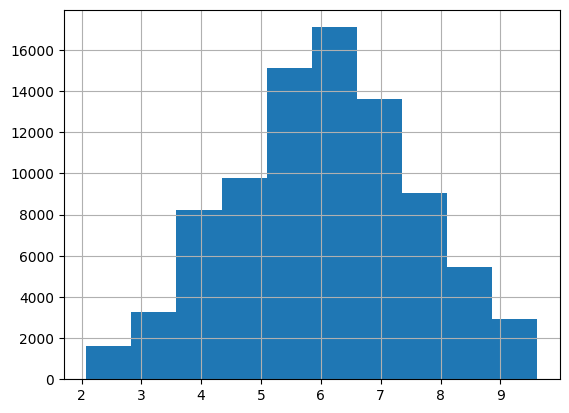

In [289]:
data4['log_Reach'].hist(bins=10)

In [290]:
data4['log_Reach'].min()

2.0794415416798357

In [291]:
data4['log_Reach'].max()

9.615805480084347

### Reason

let's create scale function and training data for model.

Exclude Day data from dataset because it's not full monts. We will get not full data model - it wouldn't work with data of other days: 24-31

In [301]:
sorted(set(data4[' Day']))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [294]:
def scale_function(x):
    sc =  (x-2)*10/7.5
    return min(max(0, sc), 10)

In [296]:
scale_function(9.6)

10.133333333333333

In [298]:
scale_function(2.1)

0.13333333333333344

In [299]:
scale_function(6)

5.333333333333333

In [304]:
df = data4[[' Weekday', ' Hour', ' Klout', 'log_Reach']]

In [305]:
df

,Weekday,Hour,Klout,log_Reach
0,Thursday,17,35.0,3.806662
1,Thursday,17,53.0,7.501634
2,Thursday,17,47.0,5.645447
3,Thursday,17,53.0,7.643962
4,Thursday,17,47.0,6.860664
...,...,...,...,...
86187,Saturday,13,44.0,6.030685
86188,Saturday,13,29.0,6.638568
86189,Saturday,13,17.0,4.812184
86190,Saturday,13,42.0,5.662960


In [344]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

In [307]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  For a comparison between tree-based ensemble models see the example
 |  :ref:`sphx_glr_auto_examp

In [308]:
rf1 = RandomForestRegressor(n_estimators=20, max_depth=5)

In [310]:
X = df[[' Weekday', ' Hour', ' Klout']]

In [311]:
y = df['log_Reach']

In [320]:
X.head(2)

,Weekday,Hour,Klout
0,Thursday,17,35.0
1,Thursday,17,53.0


In [324]:
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [325]:
enc.fit(X[[' Weekday', ' Hour']])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [356]:
vars(enc)

{'categories': 'auto',
 'sparse': 'deprecated',
 'sparse_output': False,
 'dtype': numpy.float64,
 'handle_unknown': 'ignore',
 'drop': None,
 'min_frequency': None,
 'max_categories': None,
 'feature_name_combiner': 'concat',
 '_infrequent_enabled': False,
 'n_features_in_': 2,
 'feature_names_in_': array([' Weekday', ' Hour'], dtype=object),
 'categories_': [array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
         'Wednesday'], dtype=object),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23])],
 '_drop_idx_after_grouping': None,
 'drop_idx_': None,
 '_n_features_outs': [7, 24]}

In [327]:
X_transformed = pd.concat([pd.DataFrame(enc.transform(X[[' Weekday', ' Hour']])), X[' Klout']], axis=1)

In [332]:
X_transformed.columns = list(enc.get_feature_names_out([' Weekday', ' Hour'])) + [' Klout']

In [333]:
X_transformed

,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Hour_0,Hour_1,Hour_2,...,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Klout
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86187,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0
86188,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
86189,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
86190,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0


In [354]:
y

0        3.806662
1        7.501634
2        5.645447
3        7.643962
4        6.860664
           ...   
86187    6.030685
86188    6.638568
86189    4.812184
86190    5.662960
86191    7.792762
Name: log_Reach, Length: 86192, dtype: float64

In [334]:
scores = cross_val_score(rf1, X_transformed, y, cv=5, scoring='neg_mean_absolute_error')

In [335]:
scores

array([-0.76172307, -0.75405425, -0.74785778, -0.74630107, -0.78844281])

In [336]:
scores = cross_val_score(rf1, X_transformed, y, cv=5, scoring='explained_variance')

In [337]:
scores

array([0.57514814, 0.58998277, 0.60658377, 0.61410767, 0.58123871])

### Reason 

let's make grid search to get better hyperparameters

In [352]:
X_transformed.to_csv('./X_transformed.csv')

In [353]:
y.to_csv('./log_reach.csv')

In [350]:
parameters = {'n_estimators': [10, 30, 50, 100, 200, 300], 'max_depth': [5, 10, 50, 100]}

In [342]:
rf = RandomForestRegressor(random_state=42)



In [345]:
scoring = make_scorer(mean_squared_error, greater_is_better=False)

In [346]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=parameters,
    scoring=scoring,
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [348]:
grid_search.fit(X_transformed, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

KeyboardInterrupt: 

In [ ]:
print("best params:", grid_search.best_params_)
print("best score:", -grid_search.best_score_)
best_model = grid_search.best_estimator_